In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [98]:
def strat_diversifica(prior, dinheiro, cavalo):
    return prior[cavalo]*dinheiro


def expect_eg(prior, PI, C):
    Js = []
    for i in range(0, C):
        J = prior[i]/PI[i]
        Js.append(J)
        
    return np.argwhere(Js == np.amax(Js))
    
def strat_eg(prior, PI, C, dinheiro, cavalo):
    best = expect_eq(prior, PI, C)
    
    prop = 1/len(best)
    if cavalo in best:
        return dinheiro * prop*0.99
    return 0.01*1/(C - len(best))
    

In [99]:


C = 8
A = 4

allDinheiros = []
rodadas = 1

for i in range(0, rodadas):

    Pcavalos = np.array([0.25, 0.2, 0.15, 0.1, 0.1, 0.1, 0.05, 0.05])


    apostadoresPrior = np.array([[0.8, 0.2, 0, 0, 0, 0, 0, 0],
                        [0.25, 0.2, 0.15, 0.1, 0.1, 0.1, 0.05, 0.05],
                        [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
                        [0, 0, 0, 0, 0, 0, 0.2, 0.8]])

    dinheiroPrior = np.array([0.2, 0.1, 0.5, 0.2])

    beta = np.zeros((A, C))

    for i in range(0, A):
        for j in range(0, C):
            beta[i, j] = strat_diversifica(apostadoresPrior[i, :], dinheiroPrior[i], j)

    PI = np.zeros(C)
    for j in range(0, C):
        PI[j] = np.sum(beta[:, j])

    dinheiros = []
    dinheiros.append(dinheiroPrior)
    dinheiroRestante = np.zeros(A)

    while(True):
        payoutAprox = 1/PI

        r = random.random()
        cavaloGanhador = 0
        soma = 0
        while(True):
            soma += Pcavalos[cavaloGanhador]
            if soma > r:
                break
            cavaloGanhador += 1

        payout = payoutAprox[cavaloGanhador]
    #     print(cavaloGanhador)

        novoDinheiro = beta[:, cavaloGanhador]*payout + dinheiroRestante
        print()
#         print(beta[:, cavaloGanhador]*payout)
#         print(dinheiroRestante)
#         print(novoDinheiro)
        
    #     print(novoDinheiro)

        dinheiros.append(novoDinheiro)

        zeroCount = 0
        for i in range(0, A):
            if(novoDinheiro[i] < 0.001):
                zeroCount += 1
        if zeroCount > 2:
            break

        for i in range(0, A):
            for j in range(0, C):
#                 beta[i, j] = strat_diversifica(apostadoresPrior[i, :], novoDinheiro[i], j)
                beta[i, j] = strat_eq(apostadoresPrior[i, :], PI, C, novoDinheiro[i], j)
            print(beta[i, :])
                
            dinheiroRestante[i] = novoDinheiro[i] - np.sum(beta[i, :])
        
        print()
        for j in range(0, C):
            PI[j] = np.sum(beta[:, j])
            print(PI[j])
        
    allDinheiros.append(np.array(dinheiros))    


[0. 0. 0. 0. 0. 0. 0. 0.]
[0.         0.         0.13793103 0.         0.         0.
 0.         0.        ]
[0.         0.         0.         0.28735632 0.28735632 0.28735632
 0.         0.        ]
[0. 0. 0. 0. 0. 0. 0. 0.]

0.0
0.0
0.13793103448275865
0.28735632183908044
0.28735632183908044
0.28735632183908044
0.0
0.0



/home/netware/users/raposo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/home/netware/users/raposo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in multiply
/home/netware/users/raposo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/netware/users/raposo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


ZeroDivisionError: division by zero

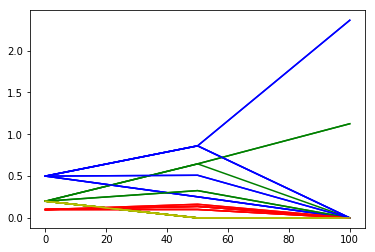

In [75]:
allDinheiros = np.array(allDinheiros)
ganhadores = []
colors = ['g', 'r', 'b', 'y']

for i in range(0, rodadas):
    l = len(allDinheiros[i])
    ganhadores.append (np.argmax(allDinheiros[i][l-1]))
    for j in range(0, A):
        plt.plot(np.linspace(0, 100, l),allDinheiros[i][:, j], colors[j])

plt.show()

(array([8., 0., 2.]), array([0, 1, 2, 3]), <a list of 3 Patch objects>)

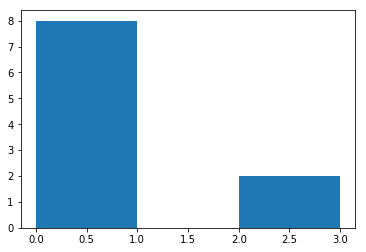

In [78]:
plt.hist(ganhadores, bins = [0, 1, 2, 3])

In [82]:
allDinheiros[3]

array([[0.2       , 0.1       , 0.5       , 0.2       ],
       [0.        , 0.13793103, 0.86206897, 0.        ],
       [0.        , 0.        , 2.36406619, 0.        ]])